In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [52]:
# df = pd.read_csv(r'C:\Users\ASUS\Deep learning\datasets\Superstore_USA.csv')
df = pd.read_csv('C:\\Users\\ASUS\\Deep learning\\datasets\\SuperstoreUSA.csv', encoding='latin-1')

df.head()

,Row ID,Order Priority,Discount,Unit Price,Shipping Cost,Customer ID,Customer Name,Ship Mode,Customer Segment,Product Category,...,Region,State or Province,City,Postal Code,Order Date,Ship Date,Profit,Quantity ordered new,Sales,Order ID
0,18606,Not Specified,0.01,2.88,0.50,2,Janice Fletcher,Regular Air,Corporate,Office Supplies,...,Central,Illinois,Addison,60101,28-05-2012,30-05-2012,1.3200,2,5.90,88525
1,20847,High,0.01,2.84,0.93,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,07-07-2010,08-07-2010,4.5600,4,13.01,88522
2,23086,Not Specified,0.03,6.68,6.15,3,Bonnie Potter,Express Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-47.6400,7,49.92,88523
3,23087,Not Specified,0.01,5.68,3.60,3,Bonnie Potter,Regular Air,Corporate,Office Supplies,...,West,Washington,Anacortes,98221,27-07-2011,28-07-2011,-30.5100,7,41.64,88523
4,23088,Not Specified,0.00,205.99,2.50,3,Bonnie Potter,Express Air,Corporate,Technology,...,West,Washington,Anacortes,98221,27-07-2011,27-07-2011,998.2023,8,1446.67,88523


In [53]:
df.shape

(9426, 24)

In [54]:
df.isnull().sum()

Row ID                   0
Order Priority           0
Discount                 0
Unit Price               0
Shipping Cost            0
Customer ID              0
Customer Name            0
Ship Mode                0
Customer Segment         0
Product Category         0
Product Sub-Category     0
Product Container        0
Product Name             0
Product Base Margin     72
Region                   0
State or Province        0
City                     0
Postal Code              0
Order Date               0
Ship Date                0
Profit                   0
Quantity ordered new     0
Sales                    0
Order ID                 0
dtype: int64

In [55]:
df['Product Base Margin'].fillna(df['Product Base Margin'].mean(), inplace=True)

In [56]:
df.isnull().sum()

Row ID                  0
Order Priority          0
Discount                0
Unit Price              0
Shipping Cost           0
Customer ID             0
Customer Name           0
Ship Mode               0
Customer Segment        0
Product Category        0
Product Sub-Category    0
Product Container       0
Product Name            0
Product Base Margin     0
Region                  0
State or Province       0
City                    0
Postal Code             0
Order Date              0
Ship Date               0
Profit                  0
Quantity ordered new    0
Sales                   0
Order ID                0
dtype: int64

In [57]:
df['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1804
Critical            1
Name: Order Priority, dtype: int64

In [58]:
df['Order Priority'].unique()

array(['Not Specified', 'High', 'Medium', 'Low', 'Critical', 'Critical '],
      dtype=object)

In [59]:
df['Order Priority']=df['Order Priority'].replace('Critical ','Critical')

In [60]:
df['Order Priority'].value_counts()

High             1970
Low              1926
Not Specified    1881
Medium           1844
Critical         1805
Name: Order Priority, dtype: int64

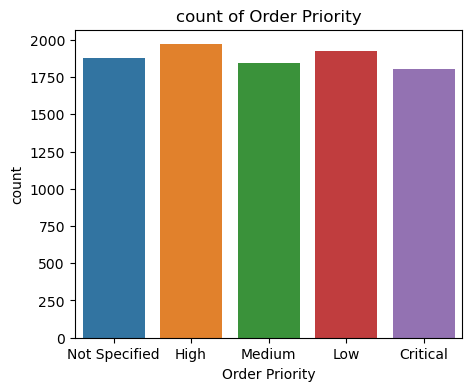

In [61]:
plt.figure(figsize=(5,4))
sbn.countplot(x = 'Order Priority', data = df)
plt.title('count of Order Priority')
plt.savefig('count of Order Priority.jpg')
plt.show()

In [62]:
df['Ship Mode'].value_counts()

Regular Air       7036
Delivery Truck    1283
Express Air       1107
Name: Ship Mode, dtype: int64

In [63]:
x = df['Ship Mode'].value_counts().index
y = df['Ship Mode'].value_counts().values

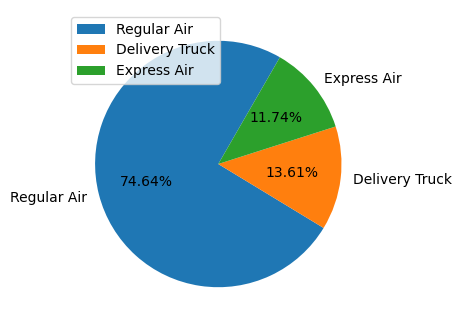

In [64]:
plt.figure(figsize=(5,4))
plt.pie(y, labels= x, startangle= 60, autopct='%0.2f%%')
plt.legend(loc = 2)
plt.savefig('mode of transport.jpg')
plt.show()

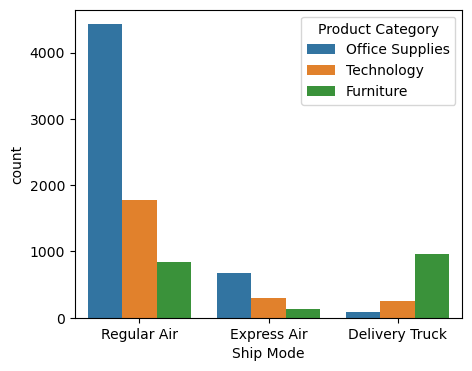

In [65]:
plt.figure(figsize=(5,4))
sbn.countplot(x = 'Ship Mode', data = df, hue= 'Product Category')
plt.savefig('ship_mode vs Product_category.jpg')
plt.show()

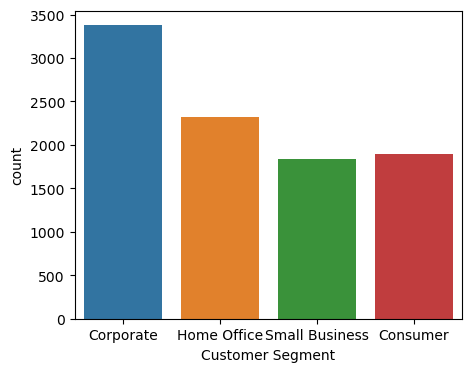

In [66]:
plt.figure(figsize=(5,4))
sbn.countplot(x = 'Customer Segment', data = df)
plt.savefig('customer segment.jpg')
plt.show()

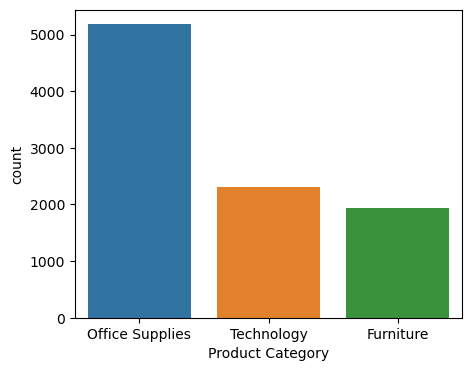

In [67]:
plt.figure(figsize=(5,4))
sbn.countplot(x = 'Product Category', data = df)
plt.savefig('Product Category.jpg')
plt.show()

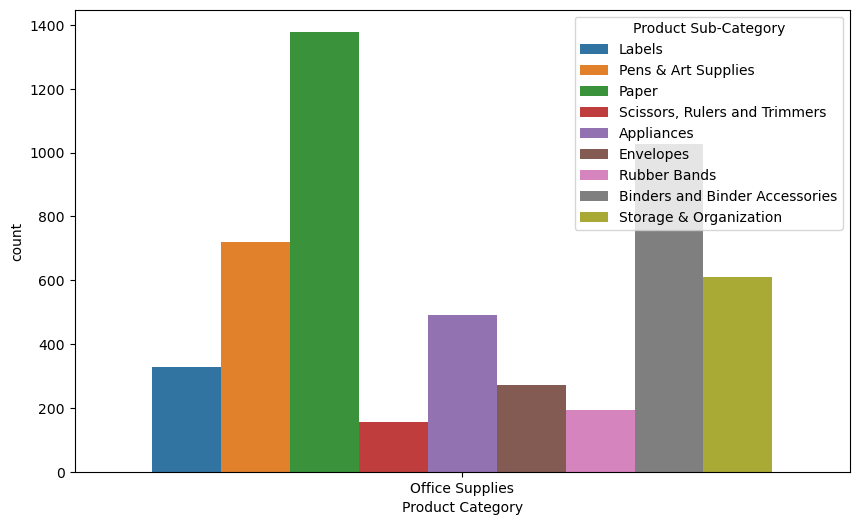

In [68]:
# Product Sub-Category
plt.figure(figsize=(10,6))
sbn.countplot(x = 'Product Category', data = df[df['Product Category'] == 'Office Supplies'], hue= 'Product Sub-Category')
plt.savefig('product_cat vs Office_supplies.jpg')
plt.show()

df.info()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row ID                9426 non-null   int64  
 1   Order Priority        9426 non-null   object 
 2   Discount              9426 non-null   float64
 3   Unit Price            9426 non-null   float64
 4   Shipping Cost         9426 non-null   float64
 5   Customer ID           9426 non-null   int64  
 6   Customer Name         9426 non-null   object 
 7   Ship Mode             9426 non-null   object 
 8   Customer Segment      9426 non-null   object 
 9   Product Category      9426 non-null   object 
 10  Product Sub-Category  9426 non-null   object 
 11  Product Container     9426 non-null   object 
 12  Product Name          9426 non-null   object 
 13  Product Base Margin   9426 non-null   float64
 14  Region                9426 non-null   object 
 15  State or Province    

In [70]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23792\3072535395.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Row ID                9426 non-null   int64         
 1   Order Priority        9426 non-null   object        
 2   Discount              9426 non-null   float64       
 3   Unit Price            9426 non-null   float64       
 4   Shipping Cost         9426 non-null   float64       
 5   Customer ID           9426 non-null   int64         
 6   Customer Name         9426 non-null   object        
 7   Ship Mode             9426 non-null   object        
 8   Customer Segment      9426 non-null   object        
 9   Product Category      9426 non-null   object        
 10  Product Sub-Category  9426 non-null   object        
 11  Product Container     9426 non-null   object        
 12  Product Name          9426 non-null   object        
 13  Product Base Margi

In [72]:
df['Order Year'] = df['Order Date'].dt.year

In [73]:
df['Order Year'].value_counts()

2013    3054
2012    2241
2011    2179
2010    1952
Name: Order Year, dtype: int64

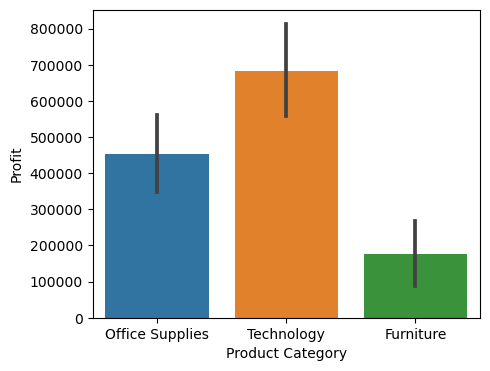

In [74]:
plt.figure(figsize=(5,4))
sbn.barplot(x = 'Product Category', y = 'Profit', data = df, estimator = 'sum')
plt.savefig('Product vs profit.jpg')
plt.show()

In [75]:
df['State or Province'].value_counts()

California              1021
Texas                    646
Illinois                 584
New York                 574
Florida                  522
Ohio                     396
Washington               327
Michigan                 327
Pennsylvania             271
North Carolina           251
Indiana                  241
Minnesota                239
Massachusetts            222
Georgia                  214
Virginia                 198
Maryland                 178
Colorado                 177
New Jersey               177
Wisconsin                169
Oregon                   168
Tennessee                166
Missouri                 161
Iowa                     156
Utah                     146
Arizona                  134
Kansas                   133
Maine                    128
Alabama                  125
Arkansas                 123
Idaho                    114
South Carolina           105
Oklahoma                 104
Louisiana                 89
New Mexico                84
Kentucky      

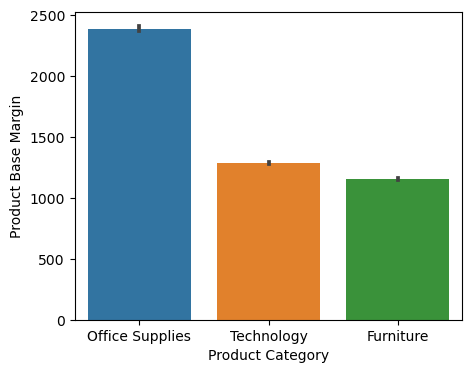

In [76]:
plt.figure(figsize=(5,4))
sbn.barplot(x = 'Product Category', y = 'Product Base Margin', data = df, estimator = 'sum')
plt.savefig('product vs product_base_mardin.jpg')
plt.show()